# 通过手写数字数据初步学习 sklearn

## 一、使用 matplotlib 视觉化手写数字图片

### 1、基本实现

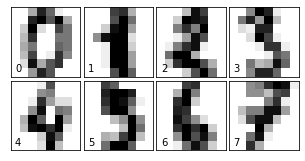

In [1]:
# 从 `sklearn` 载入 `datasets`
from sklearn import datasets
# 载入 matplotlib
import matplotlib.pyplot as plt

# 载入 `digits`
digits = datasets.load_digits()

# 设定图形的大小（宽、高）
fig = plt.figure(figsize=(4, 2)) # 设定长2、宽4的空白画布，待会将图形画在上面

# 调整子图形
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前8个手写数字展示在子图形
for i in range(8):
    # 在 2 x 4 网格中第 i + 1 个位置绘制子图形，并且关掉坐标轴刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 选择图形，色彩选择灰阶
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角标示目标值
    ax.text(0, 7, str(digits.target[i]))

# 显示图形
plt.show()

### 2、简化实现

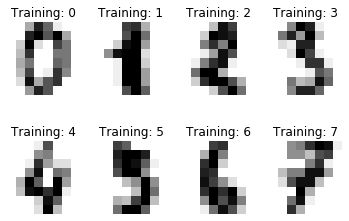

In [2]:
################################
#### 可以将上面的程序简化
################################

# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

# 將觀測值與目標值放入一個 list
images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:8]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 4, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))

# 顯示圖形
plt.show()

在这个例子中，我们将两个阵列存入 images_and_labels 这个变量，然后将这个变量中的前 8 个元素（包含 digits.images 与相对应的digits.target）在一个 2 x 4 的网格上绘制子图形，並且使用 plt.cm.binary 这个灰阶色彩，搭配子图形标题显示出来。

## 二、主成分分析

digits 资料有 64 个变量，面对这种高维度的资料，我们需要用一些方法找出特别重要的二到三个变量，或者将许多的变量组合成让我们更容易理解且视觉化的几个维度。
主成分分析是其中一个很常用的方法。

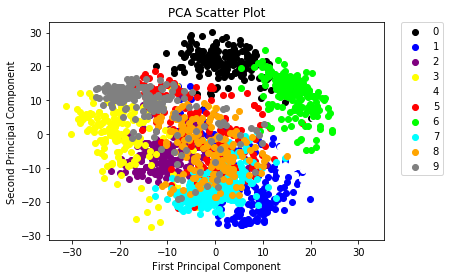

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Create a regular PCA model
pca = PCA(n_components=2) # 构建一个PCA模型

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data) # 得到 digits.data 的主成分变换数据

# 将不同颜色存储在一个 list 中，由于相异的目标值有10个（0-9），所以指定10种不同的颜色来标识
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    # 设定 x 轴和 y 轴，根据不同的目标值分别选出对应的第一和第二主成分变换数据（x轴和y轴）
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i]) # 画出散点图
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 使用target_names在旁边画出图例
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### 下一步呢？
对资料本身有一定认识后，我们必须思索的是如何应用，以及使用什么样的机器学习算法来建立预测模型。
我們想要对 digits 資料使用无监督学习算法，在机器学习地图上我们沿着资料【超过50个观测值】、【预测类别】、【没有目标值（只要不使用 digits.target即可）】、【需要知道有几个类别要预测】以及【需要小于1万个观测值】，我们可以顺利应用K-Means！

## 三、资料的预处理
在开始使用 K-Means 演算法之前，我們应该先学习资料的预处理（Preprocessing）。

### 1、资料的标准化（sklearn.preprocessing 模块的 scale 函数）

### 2、将资料切分为训练与测试资料（sklearn.model_selection模块的 train_test_split 函数)

## 四、利用 KMeans 聚类

### 1、基本实现

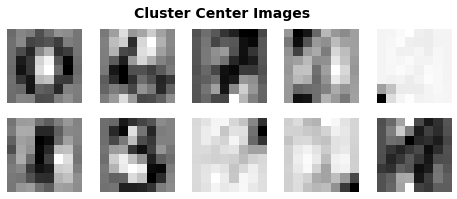

In [4]:
# 建立 K-Means 模型
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
from sklearn import cluster


# 数据预处理
digits = datasets.load_digits() # 载入数据
data = scale(digits.data) # 标准化
# 划分训练集和测试集
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target,digits.images, test_size=0.25, random_state=42)


# KMeans 聚类
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42) # 通过 cluster 模块的 KMeans 方法建立 kMeans 模型
clf.fit(X_train) # 利用训练集训练模型


# 可视化
# 载入 matplotlib
import matplotlib.pyplot as plt

# 设定图形的大小
fig = plt.figure(figsize=(8, 3))

# 图形标题
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# 对所有的目标值（0 - 9）
for i in range(10):
    # 在 2x5 的网格上绘制子图形
    ax = fig.add_subplot(2, 5, i + 1)
    # 显示图片
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # 将坐标轴刻度关掉
    plt.axis('off')

# 显示图形
plt.show()

### 2、预测目标值并视觉化

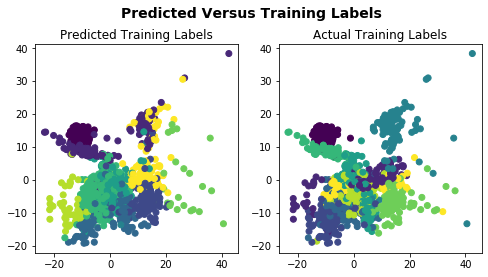

In [5]:
# 建立 K-Means 模型
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
from sklearn import cluster
# 載入 `Isomap()`
from sklearn.manifold import Isomap

digits = datasets.load_digits()
data = scale(digits.data)
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

# 使用 Isomap 对 `X_train` 资料降维
X_iso = Isomap(n_neighbors=10).fit_transform(X_train) # Isomap() 跟主成份分析不同的地方是 Isomap 屬於非線性的降維方法。

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的网格上绘制子图形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 调整图形的外观
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散点图
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# 显示图形
plt.show()

### 3、改用主成份分析重新执行上面的程序，并观察跟 Isomap 有什么差异:

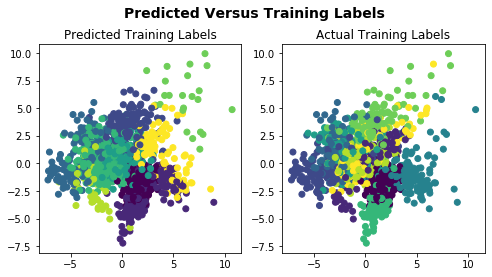

In [6]:
# 建立 K-Means 模型
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
from sklearn import cluster
# 载入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 对 `X_train` 资料降维
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的网格上绘制子图形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 调整图形的外观
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散点图
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# 显示图形
plt.show()

我们发现 K-Means 算法的效果可能不是很好，但还需要更进一步评估。

## 五、模型评估

### 1、混淆矩阵（Confusion matrix）

In [ ]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))
## OUTPUT:
## [[ 0  0 43  0  0  0  0  0  0  0]
##  [20  0  0  7  0  0  0 10  0  0]
##  [ 5  0  0 31  0  0  0  1  1  0]
##  [ 1  0  0  1  0  1  4  0 39  0]
##  [ 1 50  0  0  0  0  1  2  0  1]
##  [ 1  0  0  0  1 41  0  0 16  0]
##  [ 0  0  1  0 44  0  0  0  0  0]
##  [ 0  0  0  0  0  1 34  1  0  5]
##  [21  0  0  0  0  3  1  2 11  0]
##  [ 0  0  0  0  0  2  3  3 40  0]]

### 2、其他评估指标

In [ ]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))
## OUTPUT：
## inertia    homo   compl  v-meas     ARI AMI  silhouette
## 54276   0.688   0.733   0.710   0.567   0.674    0.146

这些指标包含了：
- Homogeneity score
- Completeness score
- V-measure score
- Adjusted rand score
- Adjusted Mutual Info score, AMI score
- Silhouette score

## 六、尝试另一种算法：支持向量机（SVM）

当训练资料没有目标值的时候采用前述的聚类算法，当分类算法具有目标值的时候就能够使用分类算法。我们再回顾一下 scikit-learn 机器学习地图，在分类算法的区域第一个看到的是线性 SVC，让我们对 digits 资料使用这个算法试试看。

### 1、基本实现

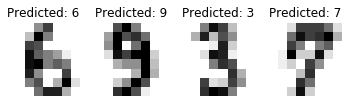

In [9]:
# 使用 SVC 演算法
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn import cluster
digits = datasets.load_digits()
data = scale(digits.data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 载入 matplotlib
import matplotlib.pyplot as plt

# 将预测结果指派给 `predicted`
predicted = svc_model.predict(X_test)

# 将 `images_test` 与 `predicted` 存入 `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# 绘制前四个元素
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # 在 1x4 的网格上绘制子图形
    plt.subplot(1, 4, index + 1)
    # 关掉坐标轴的刻度
    plt.axis('off')
    # 色彩用灰阶
    plt.imshow(image, cmap=plt.cm.binary)
    # 加入标题
    plt.title('Predicted: ' + str(prediction))

# 显示图形
plt.show()

### 2、利用 Isomap() 视觉化预测结果与目标值

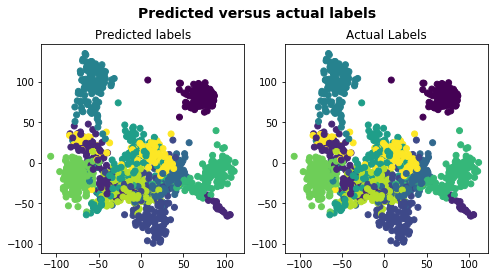

In [10]:
# 使用 SVC 演算法
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

digits = datasets.load_digits()
data = scale(digits.data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 对 `digits` 资料降维
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的网格上绘制子图形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 调整外观
fig.subplots_adjust(top=0.85)

# 绘制散点图
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')

# 加入标题
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 显示图形
plt.show()

### 3、补充：参数如何选定？
### ——示例：网格搜索法选择参数

In [13]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

digits = datasets.load_digits()
data = scale(digits.data)

# Split the `digits` data into two equal sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9866480446927375
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


除了网格搜索（Grid search），交叉验证（Cross validation）也可以自动找出合适的参数设定。